LoanTap is an online platform committed to delivering customized loan products to millennials. They innovate in an otherwise dull loan segment, to deliver instant, flexible loans on consumer friendly terms to salaried professionals.

The data science team at LoanTap is building an underwriting layer to determine the creditworthiness of individuals.


**Problem Statement:**

Given a set of attributes for an Individual, determine if a credit line should be extended to them. If so, what should the repayment terms be in business recommendations?

**Data dictionary:**

loan_amnt : The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

term : The number of payments on the loan. Values are in months and can be either 36 or 60.

int_rate : Interest Rate on the loan

installment : The monthly payment owed by the borrower if the loan originates.

grade : LoanTap assigned loan grade

sub_grade : LoanTap assigned loan subgrade

emp_title :The job title supplied by the Borrower when applying for the loan.

emp_length : Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.

home_ownership : The home ownership status provided by the borrower during registration or obtained from the credit report.

annual_inc : The self-reported annual income provided by the borrower during registration.

verification_status : Indicates if income was verified by LoanTap, not verified, or if the income source was verified

issue_d : The month which the loan was funded

loan_status : Current status of the loan - **Target Variable**

purpose : A category provided by the borrower for the loan request.

title : The loan title provided by the borrower

dti : A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LoanTap loan, divided by the borrower’s self-reported monthly income.

earliest_cr_line :The month the borrower's earliest reported credit line was opened

open_acc : The number of open credit lines in the borrower's credit file.

pub_rec : Number of derogatory public records

revol_bal : Total credit revolving balance

revol_util : Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.

total_acc : The total number of credit lines currently in the borrower's credit file

initial_list_status : The initial listing status of the loan. Possible values are – W, F

application_type : Indicates whether the loan is an individual application or a joint application with two co-borrowers

mort_acc : Number of mortgage accounts.

pub_rec_bankruptcies : Number of public record bankruptcies

Address: Address of the individual


**Concept Used:**

Exploratory Data Analysis
Feature Engineering
Logistic Regression
Precision Vs Recall Tradeoff


Import the dataset and do usual exploratory data analysis steps like checking the structure & characteristics of the dataset

Check how much target variable (Loan_Status) depends on different predictor variables (Use count plots, box plots, heat maps etc)

Check correlation among independent variables and how they interact with each other

**Simple Feature Engineering steps:**

E.g.: Creation of Flags- If value greater than 1.0 then 1 else 0. This can be done on:

1. Pub_rec
2. Mort_acc
3. Pub_rec_bankruptcies

Missing values and Outlier Treatment

Scaling - Using MinMaxScaler or StandardScaler

Use Logistic Regression Model from Sklearn/Statsmodel library and explain the results

**Results Evaluation:**

Classification Report

ROC AUC curve

Precision recall curve


**Tradeoff Questions:**

How can we make sure that our model can detect real defaulters and there are less false positives? 

This is important as we can lose out on an opportunity to finance more individuals and earn interest on it.

Since NPA (non-performing asset) is a real problem in this industry, it’s important we play safe and shouldn’t disburse loans to anyone

Provide actionable Insights & Recommendations

**Questionnaire (Answers should present in the text editor along with insights):**

What percentage of customers have fully paid their Loan Amount?

Comment about the correlation between Loan Amount and Installment features.

The majority of people have home ownership as _______.

People with grades ‘A’ are more likely to fully pay their loan. (T/F)

Name the top 2 afforded job titles.

Thinking from a bank's perspective, which metric should our primary focus be on..

1.ROC AUC
2.Precision
3.Recall
4.F1 Score

How does the gap in precision and recall affect the bank?

Which were the features that heavily affected the outcome?

Will the results be affected by geographical location? (Yes/No)

**Problem definition**

Given the information about the customer, Predict whether loan should be given to them 

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
data=pd.read_csv('loantap_logistic_regression.csv')

In [79]:
data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [80]:
data['application_type'].value_counts()

INDIVIDUAL    395319
JOINT            425
DIRECT_PAY       286
Name: application_type, dtype: int64

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [82]:
data.describe(include=object)

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,title,earliest_cr_line,initial_list_status,application_type,address
count,396030,396030,396030,373103,377729,396030,396030,396030,396030,396030,394275,396030,396030,396030,396030
unique,2,7,35,173105,11,6,3,115,2,14,48817,684,2,3,393700
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,Verified,Oct-2014,Fully Paid,debt_consolidation,Debt consolidation,Oct-2000,f,INDIVIDUAL,USCGC Smith\r\nFPO AE 70466
freq,302005,116018,26655,4389,126041,198348,139563,14846,318357,234507,152472,3017,238066,395319,8


#Null Value Treatment

In [83]:
data.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [84]:
data.isnull().sum()/len(data.index)*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
dtype: float64

Here, we can see That 'emp_title','emp_length','mort_acc' has significant NULLs in them. Rest all features are having very no of Nulls. we can drop them.

emp_title ---- it is a categorical variable

emp_length ---- it is a categorical variable

mort_acc ----- it is numerical variable



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


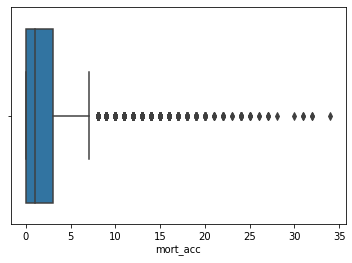

In [85]:
sns.boxplot(data['mort_acc'])

Since mort_acc is a numerical column. we can impute it with-
1. 0 ---- it would be wrong to assume that mortgage account are 0 when where we have Null values. 

2. mean ---- Data has nulls. so we can't impute mean

so we will impute medians

In [86]:
data['mort_acc'].fillna(data['mort_acc'].median(), inplace = True)

In [87]:
data.isnull().sum()/len(data.index)*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                0.000000
pub_rec_bankruptcies    0.135091
address                 0.000000
dtype: float64

Now work on emp_title column. Instead of Imputing it, let us make it a seperate class

In [88]:
data['emp_title'].fillna('unkown_title', inplace = True)

In [89]:
data.isnull().sum()/len(data.index)*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               0.000000
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                0.000000
pub_rec_bankruptcies    0.135091
address                 0.000000
dtype: float64

In emp_length, we can replace it with means. Here years are varying from 0-10. so, replace it with 5

In [90]:
data['emp_length'].fillna('5 years', inplace = True)

In [91]:
data.isnull().sum()/len(data.index)*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               0.000000
emp_length              0.000000
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                0.000000
pub_rec_bankruptcies    0.135091
address                 0.000000
dtype: float64

In [92]:
data=data.dropna()

In [93]:
data.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_title               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
title                   0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
dtype: int64

#Data Cleaning

In [94]:
data['emp_length'].value_counts()

10+ years    125270
5 years       44429
2 years       35597
< 1 year      31489
3 years       31469
1 year        25637
4 years       23811
6 years       20750
7 years       20727
8 years       19071
9 years       15215
Name: emp_length, dtype: int64

We can convert this to Numerical column.Let's make '<1 year' to '0 year' and '10+ year' to '10 year'

In [95]:
data['emp_length'] = data ['emp_length'].replace ( ['< 1 year'],'0 year')

In [96]:
data['emp_length'] = data ['emp_length'].replace ( ['10+ years'],'10 years')

In [97]:
data['emp_length'].value_counts()

10 years    125270
5 years      44429
2 years      35597
0 year       31489
3 years      31469
1 year       25637
4 years      23811
6 years      20750
7 years      20727
8 years      19071
9 years      15215
Name: emp_length, dtype: int64

In [98]:
data[['employment_age','redundent_data']] = data['emp_length'].str.split(' ',expand=True)

In [99]:
data.drop(['emp_length','redundent_data'],axis='columns',inplace=True)

In [100]:
data['employment_age'].value_counts()

10    125270
5      44429
2      35597
0      31489
3      31469
1      25637
4      23811
6      20750
7      20727
8      19071
9      15215
Name: employment_age, dtype: int64

In [101]:
data['employment_age']=data['employment_age'].astype(int)

In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393465 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             393465 non-null  float64
 1   term                  393465 non-null  object 
 2   int_rate              393465 non-null  float64
 3   installment           393465 non-null  float64
 4   grade                 393465 non-null  object 
 5   sub_grade             393465 non-null  object 
 6   emp_title             393465 non-null  object 
 7   home_ownership        393465 non-null  object 
 8   annual_inc            393465 non-null  float64
 9   verification_status   393465 non-null  object 
 10  issue_d               393465 non-null  object 
 11  loan_status           393465 non-null  object 
 12  purpose               393465 non-null  object 
 13  title                 393465 non-null  object 
 14  dti                   393465 non-null  float64
 15  

Term also has months as subscript, let's examine it.

In [103]:
data['term'].value_counts()

 36 months    300024
 60 months     93441
Name: term, dtype: int64

so it came out to be categorical column

In [104]:
data.describe(include=object)

,term,grade,sub_grade,emp_title,home_ownership,verification_status,issue_d,loan_status,purpose,title,earliest_cr_line,initial_list_status,application_type,address
count,393465,393465,393465,393465,393465,393465,393465,393465,393465,393465,393465,393465,393465,393465
unique,2,7,35,172227,6,3,112,2,14,48472,683,2,3,391162
top,36 months,B,B3,unkown_title,MORTGAGE,Verified,Oct-2014,Fully Paid,debt_consolidation,Debt consolidation,Oct-2000,f,INDIVIDUAL,USS Smith\r\nFPO AP 70466
freq,300024,115395,26518,22668,197110,138867,14838,316271,233108,152392,2999,236947,392844,8


'issued date' and 'earliest_cr_line' are dates. so to make it useful for our analysis we will try to find length which may be useful for our analysis. 

**Dealing with date columns**

In [105]:
data['issue_d']=data['issue_d'].astype('datetime64[ns]')

In [106]:
data['earliest_cr_line']=data['earliest_cr_line'].astype('datetime64[ns]')

In [107]:
data['issue_d'].head()

0   2015-01-01
1   2015-01-01
2   2015-01-01
3   2014-11-01
4   2013-04-01
Name: issue_d, dtype: datetime64[ns]

In [108]:
data['earliest_cr_line'].head()

0   1990-06-01
1   2004-07-01
2   2007-08-01
3   2006-09-01
4   1999-03-01
Name: earliest_cr_line, dtype: datetime64[ns]

In [109]:
import datetime
now=datetime.datetime.now()
data['current_date'] = pd.Series([now.date() for x in range(len(data.index))])
data['current_date']=data['current_date'].astype('datetime64[ns]')
data["credit_line_Age"] = (data['current_date'] - data['earliest_cr_line']) / np.timedelta64(1, 'D')
data["loan_Age"] = (data['current_date'] - data['issue_d']) / np.timedelta64(1, 'D')
data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,home_ownership,annual_inc,verification_status,...,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,employment_age,current_date,credit_line_Age,loan_Age
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,RENT,117000.0,Not Verified,...,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",10,2022-07-20,11737.0,2757.0
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,MORTGAGE,65000.0,Not Verified,...,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",4,2022-07-20,6593.0,2757.0
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,RENT,43057.0,Source Verified,...,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",0,2022-07-20,5467.0,2757.0
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,RENT,54000.0,Not Verified,...,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813",6,2022-07-20,5801.0,2818.0
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,MORTGAGE,55000.0,Verified,...,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650",9,2022-07-20,8542.0,3397.0


In [110]:
data.drop(['current_date','earliest_cr_line','issue_d'],inplace=True,axis='columns')

**Address doesn't seem to be  of any use for our analysis.so drop it**

In [111]:
data.drop(['address'],inplace=True,axis='columns')

In [112]:
data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,home_ownership,annual_inc,verification_status,...,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,employment_age,credit_line_Age,loan_Age
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,RENT,117000.0,Not Verified,...,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,10,11737.0,2757.0
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,MORTGAGE,65000.0,Not Verified,...,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,4,6593.0,2757.0
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,RENT,43057.0,Source Verified,...,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,0,5467.0,2757.0
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,RENT,54000.0,Not Verified,...,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,6,5801.0,2818.0
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,MORTGAGE,55000.0,Verified,...,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,9,8542.0,3397.0


In [113]:
data.describe(include=object).T

,count,unique,top,freq
term,393465,2,36 months,300024
grade,393465,7,B,115395
sub_grade,393465,35,B3,26518
emp_title,393465,172227,unkown_title,22668
home_ownership,393465,6,MORTGAGE,197110
verification_status,393465,3,Verified,138867
loan_status,393465,2,Fully Paid,316271
purpose,393465,14,debt_consolidation,233108
title,393465,48472,Debt consolidation,152392
initial_list_status,393465,2,f,236947


Here we came to know that,emp_title & title are of no use to us as there are large no of unique values in it. We can either drop it or we can do target encoding.  Here we will go with Target encoding of one column and dropping the other column.

In [114]:
data.drop(['title'],axis='columns',inplace=True)

In [115]:
categorical_features=list(data.select_dtypes('object').columns)
for i in categorical_features:
  print('unique values in {0} are {1}'.format(i,data[i].unique()))

unique values in term are [' 36 months' ' 60 months']
unique values in grade are ['B' 'A' 'C' 'E' 'D' 'F' 'G']
unique values in sub_grade are ['B4' 'B5' 'B3' 'A2' 'C5' 'C3' 'A1' 'B2' 'C1' 'A5' 'E4' 'A4' 'A3' 'D1'
 'C2' 'B1' 'D3' 'D5' 'D2' 'E1' 'E2' 'E5' 'F4' 'E3' 'D4' 'G1' 'F5' 'G2'
 'C4' 'F1' 'F3' 'G5' 'G4' 'F2' 'G3']
unique values in emp_title are ['Marketing' 'Credit analyst ' 'Statistician' ...
 "Michael's Arts & Crafts" 'licensed bankere' 'Gracon Services, Inc']
unique values in home_ownership are ['RENT' 'MORTGAGE' 'OWN' 'OTHER' 'ANY' 'NONE']
unique values in verification_status are ['Not Verified' 'Source Verified' 'Verified']
unique values in loan_status are ['Fully Paid' 'Charged Off']
unique values in purpose are ['vacation' 'debt_consolidation' 'credit_card' 'home_improvement'
 'small_business' 'major_purchase' 'other' 'medical' 'wedding' 'car'
 'moving' 'house' 'educational' 'renewable_energy']
unique values in initial_list_status are ['w' 'f']
unique values in application_

subgrade is next level categorization of grade.so we can ignore the first part, it will reduce to 5 categories.

In [116]:
data['sub_grade'] = data['sub_grade'].str[1:]

In [117]:
data['sub_grade'].nunique()

5

In [118]:
data['sub_grade']=data['sub_grade'].astype(int)

In [119]:
data.describe(include=object).T

,count,unique,top,freq
term,393465,2,36 months,300024
grade,393465,7,B,115395
emp_title,393465,172227,unkown_title,22668
home_ownership,393465,6,MORTGAGE,197110
verification_status,393465,3,Verified,138867
loan_status,393465,2,Fully Paid,316271
purpose,393465,14,debt_consolidation,233108
initial_list_status,393465,2,f,236947
application_type,393465,3,INDIVIDUAL,392844


In [120]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,393465.0,14117.269960,8353.190693,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,393465.0,13.638728,4.468866,5.32,10.49,13.33,16.49,30.99
installment,393465.0,431.946979,250.582348,16.08,250.33,375.43,567.49,1533.81
sub_grade,393465.0,2.972028,1.406815,1.00,2.00,3.00,4.00,5.00
annual_inc,393465.0,74212.294265,61628.502516,0.00,45000.00,64000.00,90000.00,8706582.00
dti,393465.0,17.383396,18.061993,0.00,11.29,16.91,22.98,9999.00
open_acc,393465.0,11.317601,5.133143,1.00,8.00,10.00,14.00,90.00
pub_rec,393465.0,0.178189,0.530628,0.00,0.00,0.00,0.00,86.00
revol_bal,393465.0,15849.758057,20552.685648,0.00,6042.00,11194.00,19630.00,1743266.00
revol_util,393465.0,53.828586,24.434544,0.00,35.90,54.90,72.90,892.30


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


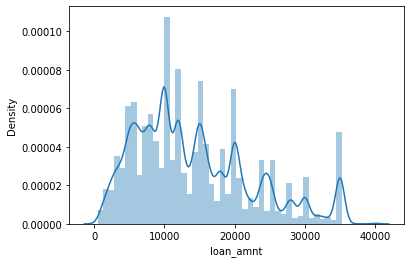

In [121]:
sns.distplot(data['loan_amnt'])

Normality is not important in logistic regression,so continue

#outliers

In [122]:
numerical_features=list(data.select_dtypes('number').columns)
numerical_features

['loan_amnt',
 'int_rate',
 'installment',
 'sub_grade',
 'annual_inc',
 'dti',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'mort_acc',
 'pub_rec_bankruptcies',
 'employment_age',
 'credit_line_Age',
 'loan_Age']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


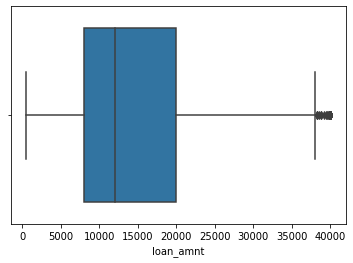

In [123]:
sns.boxplot(data['loan_amnt'])

In [124]:
#Handling outliers through Capping method. We will store suspected columns in a list.

#Then we will cap all data to 99.9th percentile and 0.1th percentile.

outlier_columns=['loan_amnt',
 'installment',
 'annual_inc',
 'dti',
 'revol_bal',
 'credit_line_Age',
 'loan_Age']

for col in outlier_columns:
    percentiles = data[col].quantile([0.01, 0.99]).values
    data[col] = np.clip(data[col], percentiles[0], percentiles[1])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


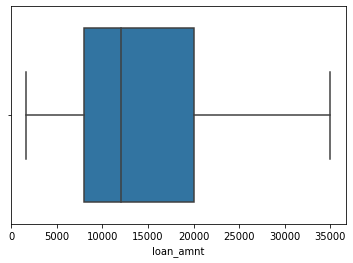

In [125]:
sns.boxplot(data['loan_amnt'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

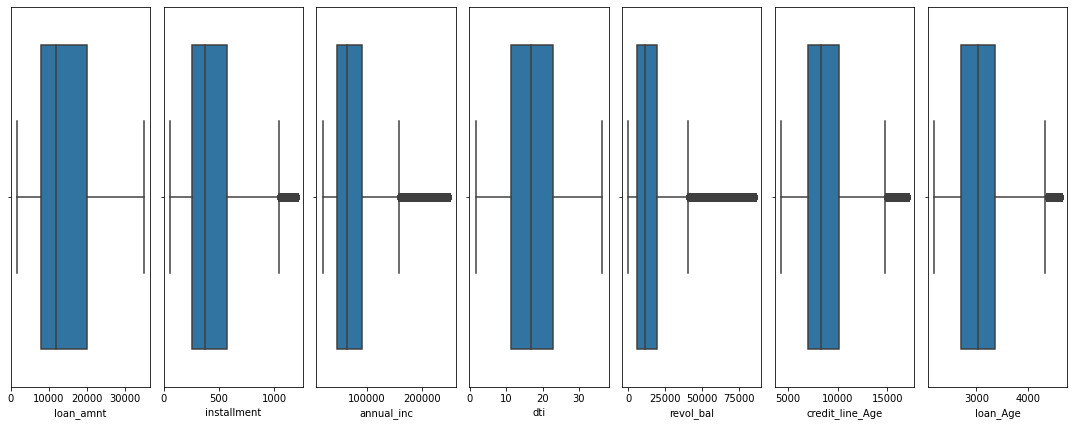

In [126]:
plt.figure(figsize=(15,6))
                          
for i,j in enumerate(outlier_columns):
 plt.subplot(1,len(outlier_columns),i+1)
 plt.subplots_adjust(hspace = 0.8)
 sns.boxplot(data[j])
 plt.tight_layout(pad=1)

We still have outliers in Data . So, Use IQR Methos to remove them 

In [127]:
for i,j in enumerate(outlier_columns):
 q1=data[j].quantile(0.25)
 q3=data[j].quantile(0.75)
 iqr=q3-q1
 data=data[(data[j]>=q1-1.5*iqr)&(data[j]<=q3+1.5*iqr)]

#Encoding Categorical Variables

Categories must not have order in them. we use one-hot encoding where categories don't have order. where categories have order then we can go for label encoding.

when no of categories are large we go for Target encoding.

In [128]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['loan_status'] = le.fit_transform(data.loan_status)
data['grade'] = le.fit_transform(data.grade)
data['home_ownership'] = le.fit_transform(data.home_ownership)
data['verification_status'] = le.fit_transform(data.verification_status)

In [129]:
data['loan_status']

0         1
1         1
2         1
3         1
4         0
         ..
393459    1
393461    1
393462    1
393463    1
393464    0
Name: loan_status, Length: 325715, dtype: int64

In [130]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [131]:
from category_encoders import TargetEncoder
encoder = TargetEncoder()
data['emp_title'] = encoder.fit_transform(data['emp_title'],data['loan_status'])
data['purpose'] = encoder.fit_transform(data['purpose'],data['loan_status'])

/usr/local/lib/python3.7/dist-packages/category_encoders/target_encoder.py:94: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/category_encoders/target_encoder.py:99: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)


In [132]:
 #data with no order between categories
temp1=pd.get_dummies(data, columns=['application_type','initial_list_status','term'], drop_first=True)
data=pd.concat([data,temp1],axis=1)

data.drop(['term','initial_list_status','application_type'],axis='columns',inplace=True)

In [133]:
data['loan_status']


,loan_status,loan_status
0,1,1
1,1,1
2,1,1
3,1,1
4,0,0
...,...,...
393459,1,1
393461,1,1
393462,1,1
393463,1,1


#Model building

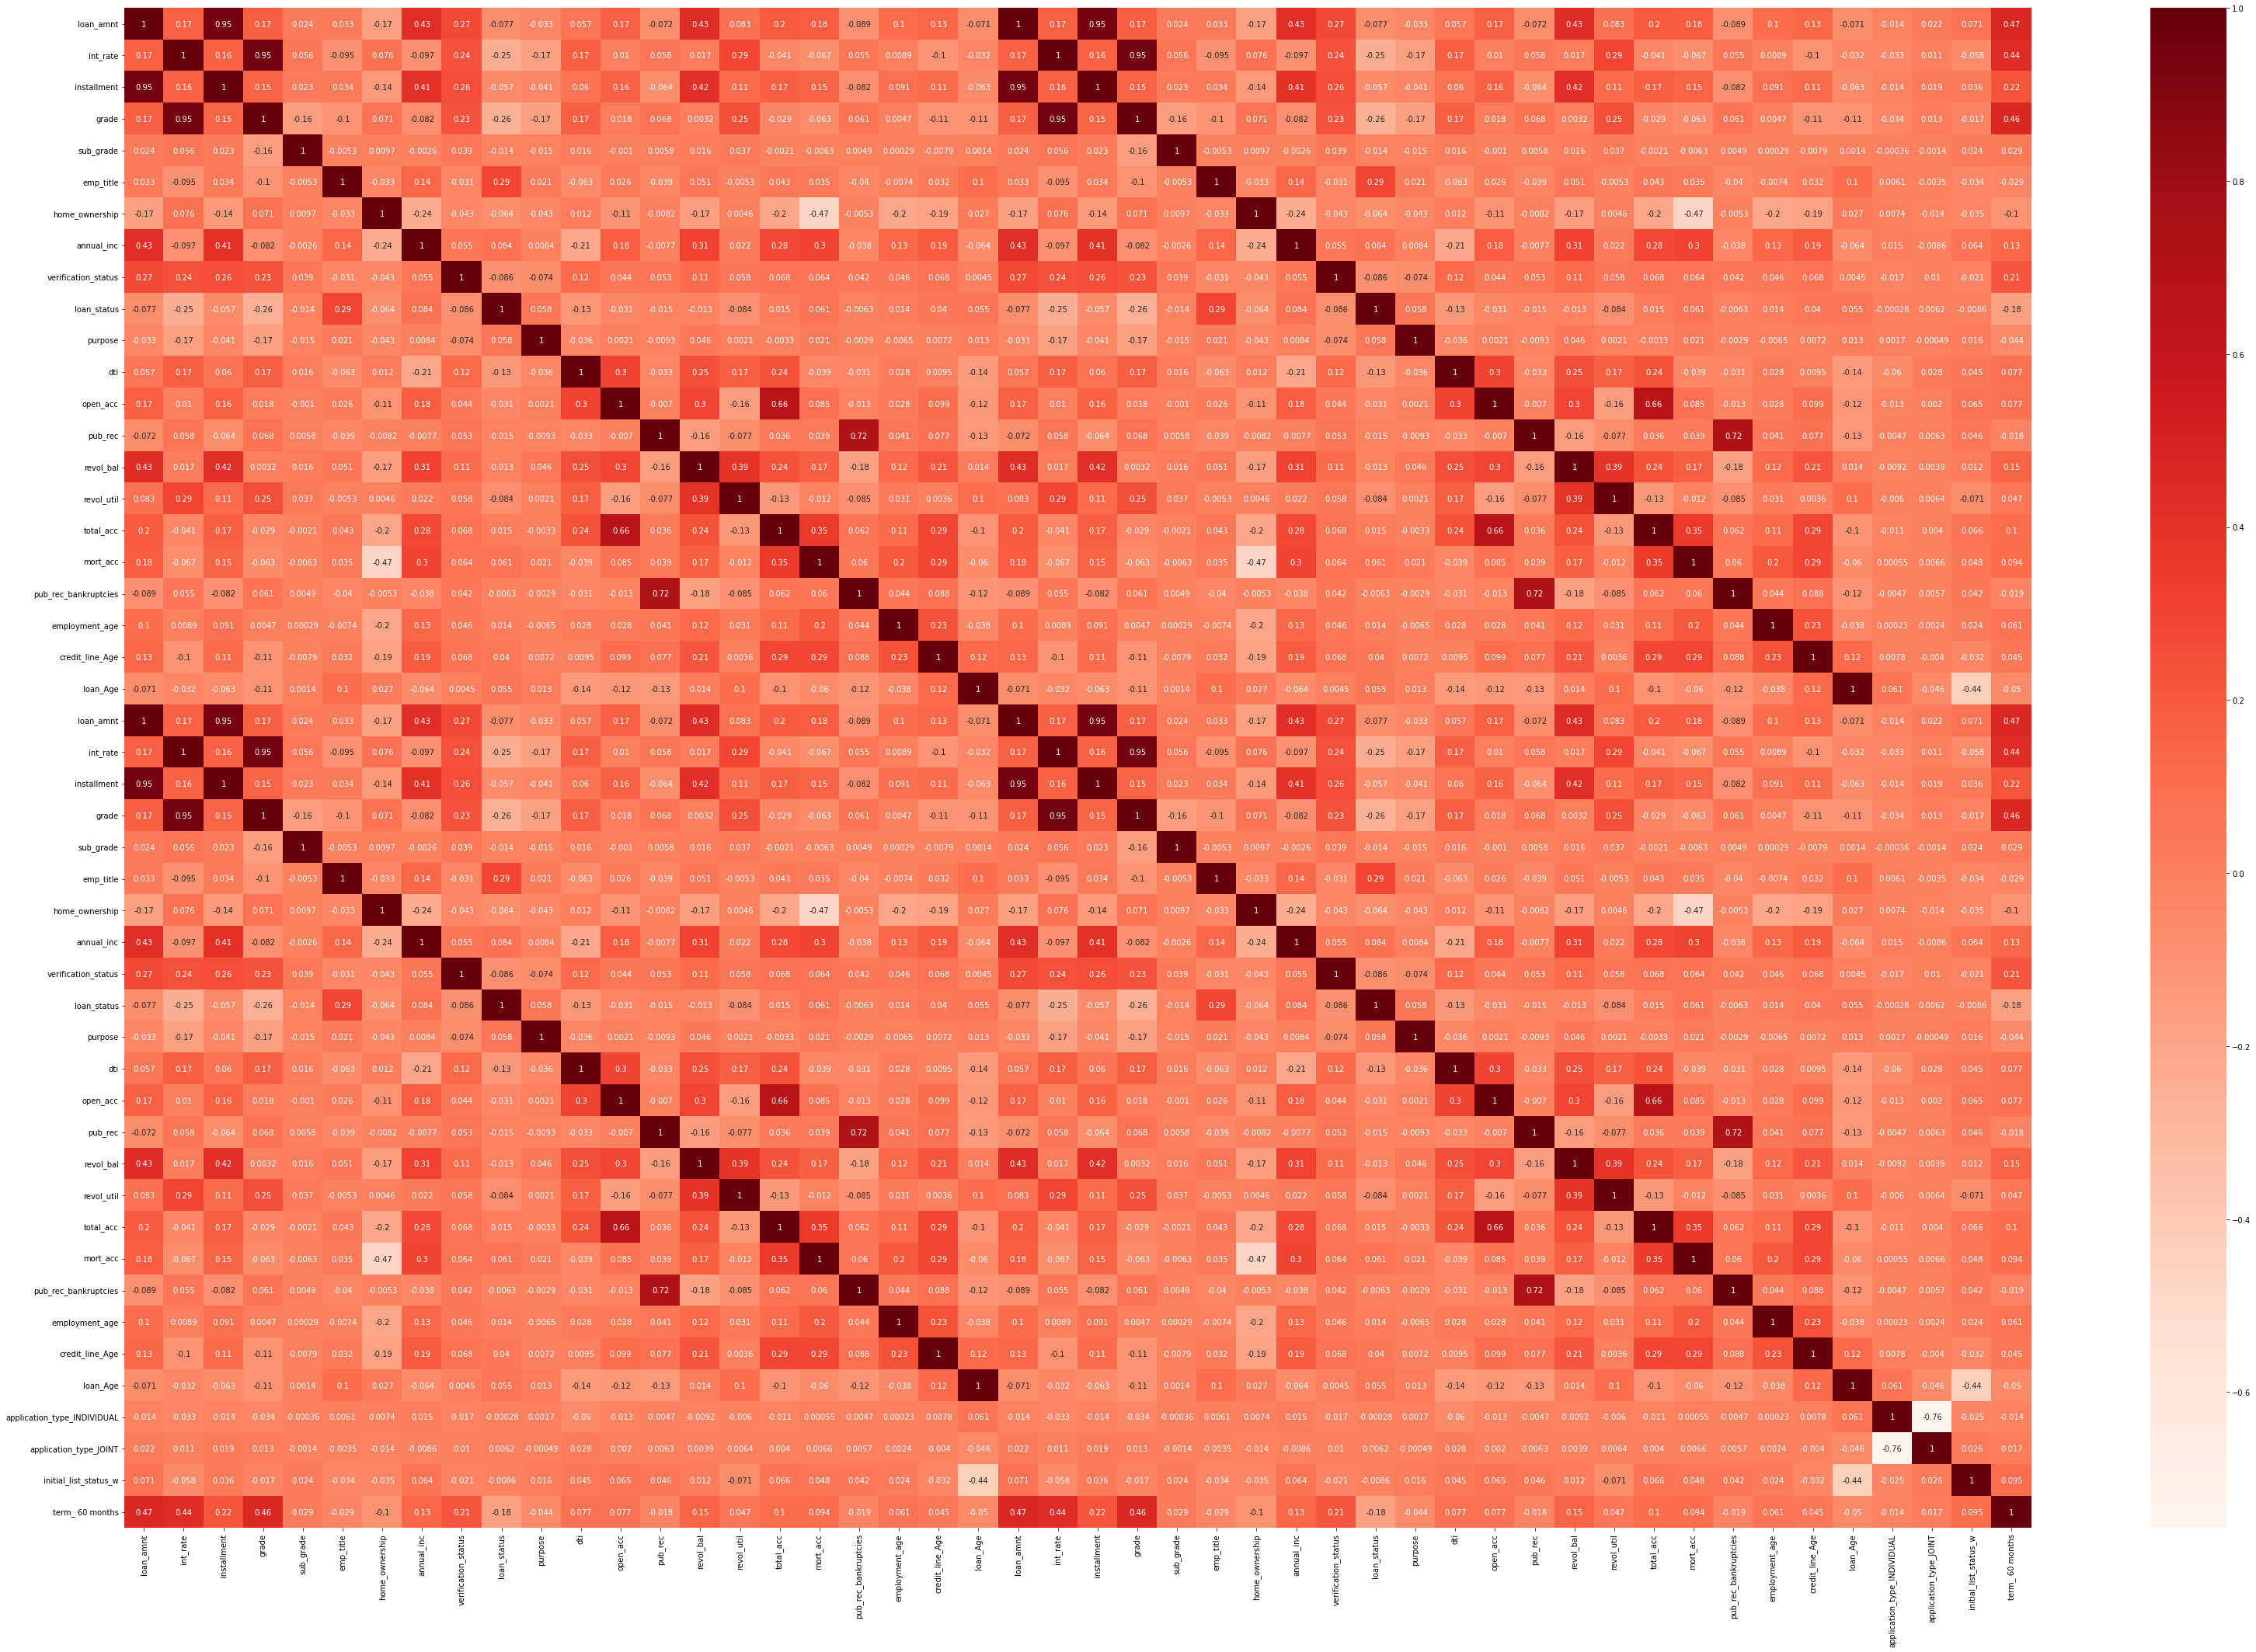

In [134]:
plt.figure(figsize=(55,36))
sns.heatmap(data.corr(),annot=True,cmap='Reds')

In [135]:
#split dependent & Independent Variables.
X = data.drop(['loan_status'],axis=1)
y = data['loan_status']
y = y.iloc[:, 1].values

In [136]:
y

array([1, 1, 1, ..., 1, 1, 0])

In [137]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [138]:
#Scale the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [139]:
y_train

array([0, 1, 1, ..., 0, 1, 0])

In [140]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [141]:
classifier.get_params(deep=True)

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 0,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [142]:
weight = classifier.coef_
weight

array([[-0.02470051,  0.1172764 , -0.03516401, -0.32448086, -0.07126307,
         0.35649176, -0.05391491,  0.07232629, -0.01937667,  0.02113182,
        -0.08504462, -0.07620091, -0.01887878,  0.03607745, -0.07285164,
         0.04641788,  0.02242338,  0.01786648,  0.01247659, -0.0088899 ,
         0.00227975, -0.02470051,  0.1172764 , -0.03516401, -0.32448086,
        -0.07126307,  0.35649176, -0.05391491,  0.07232629, -0.01937667,
         0.02113182, -0.08504462, -0.07620091, -0.01887878,  0.03607745,
        -0.07285164,  0.04641788,  0.02242338,  0.01786648,  0.01247659,
        -0.0088899 ,  0.00227975, -0.02102622,  0.02290948,  0.0256239 ,
        -0.2153804 ]])

In [143]:
def logreg_to_dict(clf, feature_names):
    coefs = np.concatenate([clf.intercept_, clf.coef_.squeeze()])
    return dict(zip(["intercept"] + feature_names, coefs))

print(logreg_to_dict(classifier,X.columns.tolist()))

{'intercept': 1.6602292173675042, 'loan_amnt': -0.024700510184082456, 'int_rate': 0.11727640164466208, 'installment': -0.03516400742362972, 'grade': -0.3244808626940508, 'sub_grade': -0.07126306982100619, 'emp_title': 0.3564917552453285, 'home_ownership': -0.05391490655845455, 'annual_inc': 0.07232628876200979, 'verification_status': -0.019376673424681905, 'purpose': 0.021131822195366485, 'dti': -0.08504462448599517, 'open_acc': -0.07620090763618272, 'pub_rec': -0.018878779388574463, 'revol_bal': 0.03607745044801071, 'revol_util': -0.07285164111673448, 'total_acc': 0.04641788406316607, 'mort_acc': 0.022423380596490003, 'pub_rec_bankruptcies': 0.01786647618477286, 'employment_age': 0.012476588205988055, 'credit_line_Age': -0.008889901688325605, 'loan_Age': 0.0022797483904202194, 'application_type_INDIVIDUAL': -0.021026219047345144, 'application_type_JOINT': 0.022909480210216406, 'initial_list_status_w': 0.02562390092080943, 'term_ 60 months': -0.2153804041400563}


Grade and employee title are most Important features here as they are largest in Magnitude.

coeff of employee_title is positive. so it effects the probability of x belonging to class 1 positively.

high Grade means lower probablity of X belonging to class 1.as it has -ve coeff. 

In [144]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [145]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score
cm = confusion_matrix(y_test, y_pred)

In [146]:
cm

array([[ 2704, 10503],
       [ 1588, 50348]])

In [147]:
precision_score(y_test,y_pred)

0.827398070697277

precision here is 0.83 which is good. Bad precision means we will get False positives.

This will lead to giving loan to people who couldnot pay.This will lead to NPA. so precision help us lower down Bank NPA

In [148]:
recall_score(y_test,y_pred)

0.9694239063462723

Recall is also good. Bad recall means more false negatives. This will lead to losing Important customers.

good recall will ensure that we will not lose any important customers.

In [149]:
f1_score(y_test,y_pred)

0.8927979288393167

In [150]:
#Estimate the probability of belonging to class 1
probs=classifier.predict_proba(X_test)[:,1]

0.7699012287682725

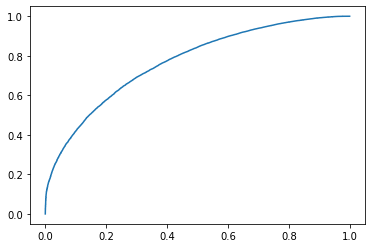

In [151]:
from sklearn.metrics import roc_auc_score,roc_curve
fpr,tpr,thres=roc_curve(y_test,probs)
plt.plot(fpr,tpr)
roc_auc_score(y_test,probs)

Here, AUC score is greater than 0.50. it means our model can predict the positive & Negative class well. Max score can be 1 but we got 0.758. 

This can help us compare two models. we make many models for classification and choose the one with max AUC.

#Actionable Insights
1.Here Grade and job_title are most Important columns. So we must look for these beore giving loan to someone.

2.we must look for probablity before  we sanction loan to someone. and not just the prediction.

looking for probability will give us more confidence about loan_status


